<a href="https://colab.research.google.com/github/gerryfrank10/AI2025/blob/main/autoencoder_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./data", train=True,
                         download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=32, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 64.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 27.2MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 64.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.33MB/s]


In [4]:
class AE(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 12),
        nn.ReLU(),
        nn.Linear(12, 3)
    )
    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid()
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [5]:
model = AE()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [6]:
epochs = 20
outputs = []
losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
  for images, _ in loader:
    images = images.reshape(-1, 28*28).to(device)

    reconstructed = model(images)
    loss = criterion(reconstructed, images)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  outputs.append((epoch, images, reconstructed))
  print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

Epoch: 1, Loss: 0.047097645699977875
Epoch: 2, Loss: 0.04018904268741608
Epoch: 3, Loss: 0.03177231550216675
Epoch: 4, Loss: 0.03586222976446152
Epoch: 5, Loss: 0.03043527901172638
Epoch: 6, Loss: 0.03497937321662903
Epoch: 7, Loss: 0.033528268337249756
Epoch: 8, Loss: 0.0334085114300251
Epoch: 9, Loss: 0.037792760878801346
Epoch: 10, Loss: 0.03622833266854286
Epoch: 11, Loss: 0.02978895604610443
Epoch: 12, Loss: 0.03299561142921448
Epoch: 13, Loss: 0.02485807240009308
Epoch: 14, Loss: 0.03403288871049881
Epoch: 15, Loss: 0.035986244678497314
Epoch: 16, Loss: 0.030726132914423943
Epoch: 17, Loss: 0.030199235305190086
Epoch: 18, Loss: 0.027995944023132324
Epoch: 19, Loss: 0.027027398347854614
Epoch: 20, Loss: 0.0315248966217041


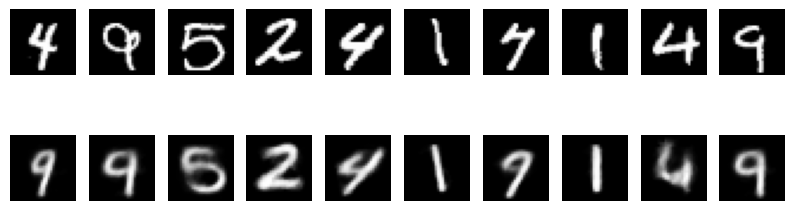

In [10]:
model.eval()
dataiter = iter(loader)
images, _ = next(dataiter)

images = images.view(-1, 28 * 28).to(device)
reconstructed = model(images)

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()

In [12]:
len(dataiter)

1875